## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('marketing_campaign_data.csv',index_col=0)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Tugas 1 - Conversion Rate Analysis Based on Income, Spending and Age

1. Download file 'Dataset'

2. Melakukan feature engineering: conversion rate

3. Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok

4. Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user 
yang berpotensi lebih besar untuk merespon campaign

5. Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer 
dengan conversion rate

In [7]:
num = df.select_dtypes(exclude='object').columns.tolist()
cat = df.select_dtypes(include='object').columns.tolist()

print('Total numerical columns :', len(num))
print('Total categorical columns :', len(cat))

Total numerical columns : 26
Total categorical columns : 3


In [8]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value count kolom Dt_Customer:
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64



In [9]:
df[num].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df[cat].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


### Age with CVR

In [11]:
df['Age'] = 2022 - df['Year_Birth']

In [12]:
df['CVR'] = np.where(df['NumWebVisitsMonth']>0,
                               df['Response']/df['NumWebVisitsMonth'], 0.0)

In [13]:
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

In [14]:
df['CVR']

0       0.142857
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2235    0.000000
2236    0.000000
2237    0.000000
2238    0.000000
2239    0.142857
Name: CVR, Length: 2240, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

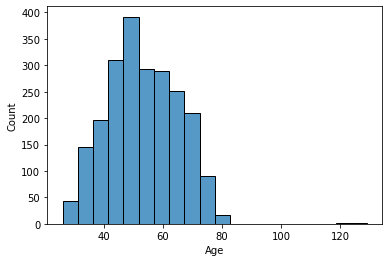

In [15]:
sns.histplot(df['Age'], bins=20)

In [16]:
def age_group(x):
    if x <= 30:
        return '20-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    elif x <= 80:
        return '71-80'
    else:
        return '>80'

df['AgeGroup'] = df['Age'].apply(lambda x : age_group(x))
CVR_by_age = df.groupby('AgeGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_by_age

,AgeGroup,ID,CVR
0,20-30,28,0.111111
1,31-40,318,0.075120
2,41-50,654,0.032680
3,51-60,585,0.032222
4,61-70,473,0.042437
5,71-80,177,0.056957
6,>80,5,0.000000


Text(-0.5, 0.12, "The Older the Visitor's Age, the Average Conversion Rate Will Tend to Decrease")

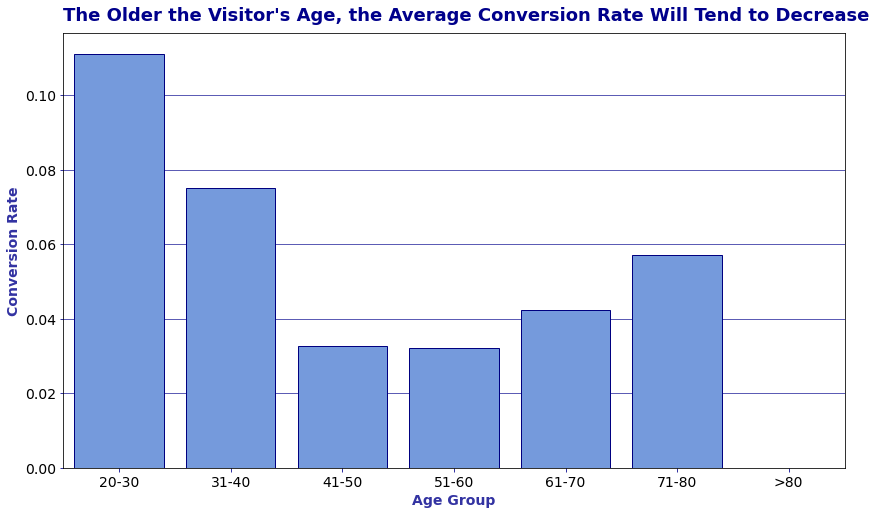

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
sns.barplot(data=CVR_by_age, x='AgeGroup', y='CVR', color='cornflowerblue',
            edgecolor='navy', ax=ax)

ax.set_xlabel('Age Group', fontsize=14, fontweight='bold', alpha=0.8, color ='darkblue')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8, color ='darkblue')
plt.tick_params(axis='both', which='major', labelsize=14, color ='darkblue')
plt.grid(axis='y', alpha=0.8, color ='darkblue')
ax.set_axisbelow(True)

plt.text(s="The Older the Visitor's Age, the Average Conversion Rate Will Tend to Decrease",
         x=-0.5, y=0.12, fontsize=18, fontweight='bold', color ='darkblue')




In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Income with CVR

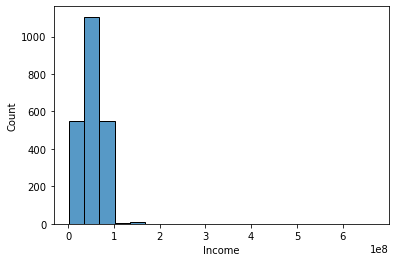

In [19]:
sns.histplot(df['Income'], bins=20)
plt.show()

In [20]:
income = np.where(df['Income']>100000000, 110000000, df['Income'])
income_bins = list(np.arange(0, max(income)+10000000, 10000000))
income_labs = ['{}M-{}M'.format(i*10, (i+1)*10) for i in range(10)] + ['>100M']
df['IncomeGroup'] = pd.cut(income, bins=income_bins, labels=income_labs)
CVR_income = df.groupby('IncomeGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_income

,IncomeGroup,ID,CVR
0,0M-10M,29,0.011973
1,10M-20M,98,0.014375
2,20M-30M,243,0.013972
3,30M-40M,362,0.017547
4,40M-50M,328,0.016988
5,50M-60M,315,0.013540
6,60M-70M,333,0.028662
7,70M-80M,291,0.073409
8,80M-90M,164,0.189956
9,90M-100M,40,0.284821


Text(-0.5, 0.34, ' Visitors with Income Above 60 Million that Affect the Increase in Conversion Rates')

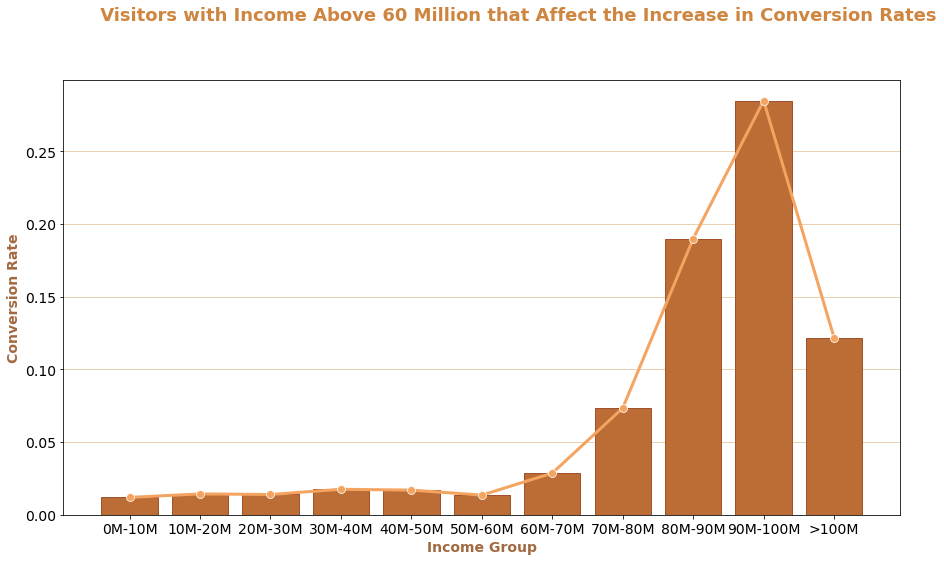

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.barplot(data=CVR_income, x='IncomeGroup', y='CVR', color='chocolate',
            edgecolor='sienna', ax=ax)
sns.lineplot(data=CVR_income, x='IncomeGroup', y='CVR', color='sandybrown',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Income Group', fontsize=14, fontweight='bold', alpha=0.8, color='saddlebrown')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8, color='saddlebrown')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8, color='burlywood')
ax.set_axisbelow(True)

plt.text(s=" Visitors with Income Above 60 Million that Affect the Increase in Conversion Rates",
         x=-0.5, y=0.34, fontsize=18, fontweight='bold', color ='peru')

### Children with CVR

In [22]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [23]:
CVR_children = df.groupby('Children', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_children

,Children,ID,CVR
0,0,638,0.114525
1,1,1128,0.015387
2,2,421,0.015836
3,3,53,0.005391


Text(-0.5, 0.125, "Visitors who don't have children have the highest conversion rates.")

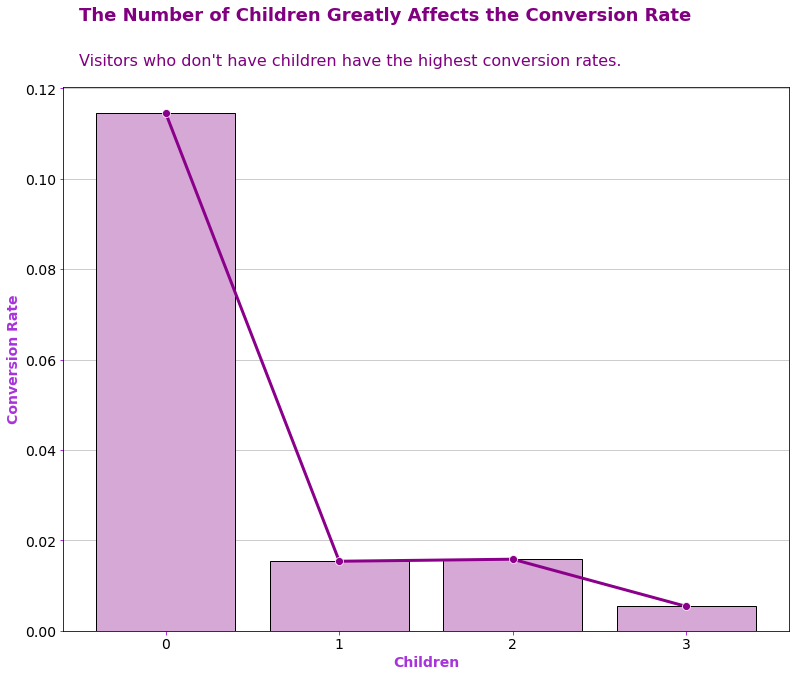

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(13,10))
sns.barplot(data=CVR_children, x='Children', y='CVR', color='plum',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_children, x='Children', y='CVR', color='darkmagenta',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Children', fontsize=14, fontweight='bold', alpha=0.8, color='darkviolet')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8, color='darkviolet')
plt.tick_params(axis='both', which='major', labelsize=14, color='darkviolet')
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.text(s="The Number of Children Greatly Affects the Conversion Rate",
         x=-0.5, y=0.135, fontsize=18, fontweight='bold', color='purple')
plt.text(s="Visitors who don't have children have the highest conversion rates.",
         x=-0.5, y=0.125, fontsize=16, color='purple')

### Total Spending With CVR

In [25]:
df['TotalSpending'] = df.filter(regex='Mnt', axis=1).sum(axis=1)

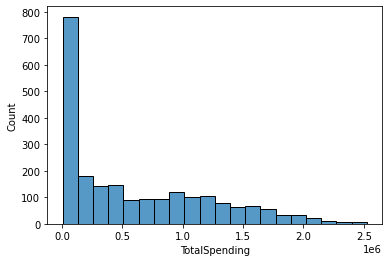

In [26]:
sns.histplot(df['TotalSpending'], bins=20)
plt.show()

In [27]:
def spending_group(x):
    if x <= 500000:
        return '0-0.5M'
    elif x <= 1000000:
        return '0.5M-1M'
    elif x <= 1500000:
        return '1M-1.5M'
    elif x <= 2000000:
        return '1.5M-2M'
    elif x <= 2500000:
        return '2M-2.5M'
    else:
        return '>2.5M'

df['SpendingGroup'] = df['TotalSpending'].apply(lambda x : spending_group(x))
CVR_spending = df.groupby('SpendingGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_spending = CVR_spending.sort_values('ID', ascending=False)
CVR_spending

,SpendingGroup,ID,CVR
0,0-0.5M,1246,0.013765
1,0.5M-1M,392,0.023421
3,1M-1.5M,356,0.076065
2,1.5M-2M,196,0.167379
4,2M-2.5M,47,0.210816
5,>2.5M,3,0.416667


Text(-0.3, 0.45, "The Greater Visitor's Total Spending, The Higher The Conversion Rate")

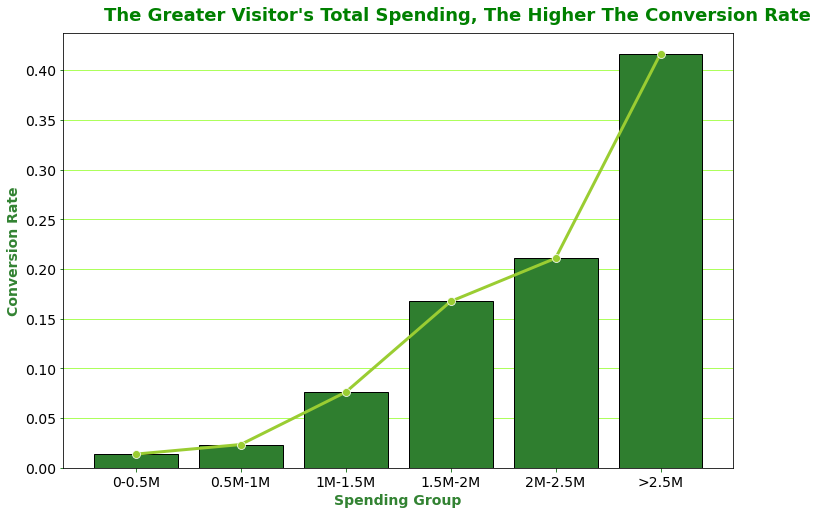

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=CVR_spending, x='SpendingGroup', y='CVR', color='forestgreen',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_spending, x='SpendingGroup', y='CVR', color='yellowgreen',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Spending Group', fontsize=14, fontweight='bold', alpha=0.8, color='darkgreen')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8, color='darkgreen')
plt.tick_params(axis='both', which='major', labelsize=14, color='darkgreen')
plt.grid(axis='y', alpha=0.8, color='chartreuse')
ax.set_axisbelow(True)

plt.text(s="The Greater Visitor's Total Spending, The Higher The Conversion Rate",
         x=-0.3, y=0.45, fontsize=18, fontweight='bold', color ='g')

### Total Transaction with CVR

In [29]:
df['NumberOfTransactions'] = df.filter(regex='Purchase', axis=1).sum(axis=1)

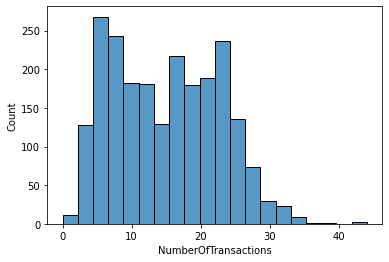

In [30]:
sns.histplot(df['NumberOfTransactions'], bins=20)
plt.show()

In [31]:
def transactions_group(x):
    if x <= 10:
        return '0-10'
    elif x <= 20:
        return '10-20'
    elif x <= 30:
        return '20-30'
    elif x <= 40:
        return '30-40'
    else:
        return '>40'

df['TransactionGroup'] = df['NumberOfTransactions'].apply(lambda x : transactions_group(x))
CVR_transaction = df.groupby('TransactionGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_transaction

,TransactionGroup,ID,CVR
0,0-10,832,0.010970
1,10-20,801,0.060473
2,20-30,571,0.068024
3,30-40,34,0.028466
4,>40,2,0.000000


Text(-0.3, 0.08, 'Why visitors who make transactions above 40 times will not be converted?')

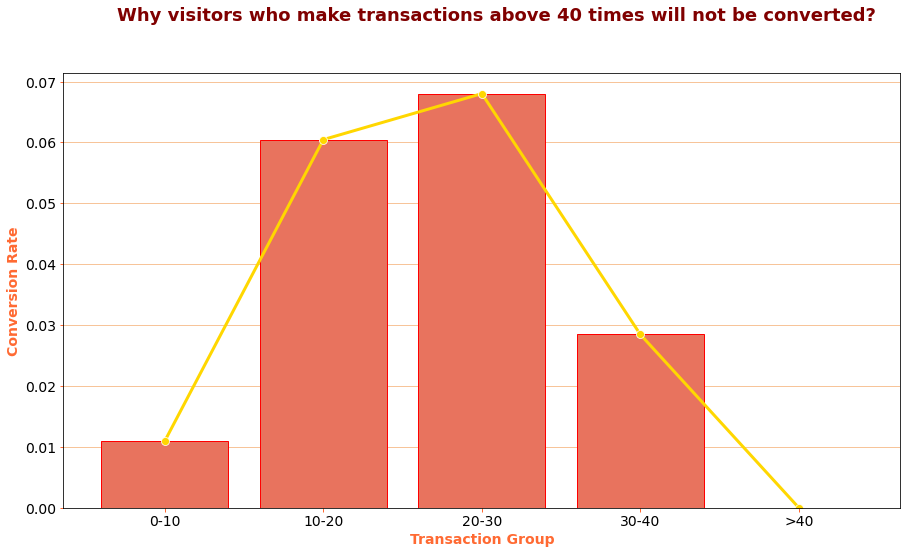

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.barplot(data=CVR_transaction, x='TransactionGroup', y='CVR', color='tomato',
            edgecolor='red', ax=ax)
sns.lineplot(data=CVR_transaction, x='TransactionGroup', y='CVR', color='gold',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Transaction Group', fontsize=14, fontweight='bold', alpha=0.8, color='orangered')
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8, color='orangered')
plt.tick_params(axis='both', which='major', labelsize=14, color='orangered')
plt.grid(axis='y', alpha=0.8, color='sandybrown')
ax.set_axisbelow(True)

plt.text(s="Why visitors who make transactions above 40 times will not be converted?",
         x=-0.3, y=0.08, fontsize=18, fontweight='bold', color= 'maroon')



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    2240 non-null   int64   
 1   Year_Birth            2240 non-null   int64   
 2   Education             2240 non-null   object  
 3   Marital_Status        2240 non-null   object  
 4   Income                2216 non-null   float64 
 5   Kidhome               2240 non-null   int64   
 6   Teenhome              2240 non-null   int64   
 7   Dt_Customer           2240 non-null   object  
 8   Recency               2240 non-null   int64   
 9   MntCoke               2240 non-null   int64   
 10  MntFruits             2240 non-null   int64   
 11  MntMeatProducts       2240 non-null   int64   
 12  MntFishProducts       2240 non-null   int64   
 13  MntSweetProducts      2240 non-null   int64   
 14  MntGoldProds          2240 non-null   int64   
 15  NumD

# Tugas 2 - Data Clean and Preprocessing

1. Mengatasi data null dan duplicated

2. Membuang data yang tidak diperlukan

3. Melakukan feature encoding

4. Melakukan standardisasi pada feature

In [34]:
df1=df.copy()

### Handling Missing Values

In [35]:
df1.isna().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntCoke                  0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
CVR                      0
AgeGroup                 0
IncomeGroup             24
Children                 0
TotalSpending            0
SpendingGroup            0
NumberOfTransactions     0
T

In [36]:
df1['Income'].fillna(df1['Income'].median(), inplace=True)
df1['IncomeGroup'].fillna('50M-60M', inplace=True)


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    2240 non-null   int64   
 1   Year_Birth            2240 non-null   int64   
 2   Education             2240 non-null   object  
 3   Marital_Status        2240 non-null   object  
 4   Income                2240 non-null   float64 
 5   Kidhome               2240 non-null   int64   
 6   Teenhome              2240 non-null   int64   
 7   Dt_Customer           2240 non-null   object  
 8   Recency               2240 non-null   int64   
 9   MntCoke               2240 non-null   int64   
 10  MntFruits             2240 non-null   int64   
 11  MntMeatProducts       2240 non-null   int64   
 12  MntFishProducts       2240 non-null   int64   
 13  MntSweetProducts      2240 non-null   int64   
 14  MntGoldProds          2240 non-null   int64   
 15  NumD

### Handling Duplicated Data

In [38]:
df1.duplicated().sum()

0

In [39]:
df1.drop('ID', axis=1).duplicated().any()

True

In [40]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,CVR,AgeGroup,IncomeGroup,Children,TotalSpending,SpendingGroup,NumberOfTransactions,TransactionGroup
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,0.142857,61-70,50M-60M,0,1617000,1.5M-2M,25,20-30
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,0.000000,61-70,40M-50M,2,27000,0-0.5M,6,0-10
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,0.000000,51-60,70M-80M,0,776000,0.5M-1M,21,20-30
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,0.000000,31-40,20M-30M,1,53000,0-0.5M,8,0-10
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,0.000000,41-50,50M-60M,1,422000,0-0.5M,19,10-20


### Handling Outliers

In [41]:
filtered_entries = (df1['Income']>600000000) | (df1['Age']>80) | (df1['NumberOfTransactions']>40)  
df1 = df1[~filtered_entries]


### Remove Unnecessary Columns From Dataset

In [42]:
print(f'Before Filtered are {df1.shape[1]} columns')
remove_cols = ['ID','Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer',
               'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
               'Z_CostContact', 'Z_Revenue']
df1.drop(columns=remove_cols, axis=1, inplace=True)
print(f'After Filtered are {df1.shape[1]} columns')

Before Filtered are 38 columns
After Filtered are 16 columns


### Feature Encoding

In [43]:
cat_cols = df1.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f'Number of Unique Value {col} is {df1[col].nunique()}:')
    print(sorted(df1[col].unique().tolist()))
    print('\n')

Number of Unique Value Education is 5:
['D3', 'S1', 'S2', 'S3', 'SMA']


Number of Unique Value Marital_Status is 6:
['Bertunangan', 'Cerai', 'Duda', 'Janda', 'Lajang', 'Menikah']


Number of Unique Value AgeGroup is 6:
['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']


Number of Unique Value SpendingGroup is 6:
['0-0.5M', '0.5M-1M', '1.5M-2M', '1M-1.5M', '2M-2.5M', '>2.5M']


Number of Unique Value TransactionGroup is 4:
['0-10', '10-20', '20-30', '30-40']




In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2232 non-null   object  
 1   Marital_Status        2232 non-null   object  
 2   Income                2232 non-null   float64 
 3   Recency               2232 non-null   int64   
 4   NumWebVisitsMonth     2232 non-null   int64   
 5   Complain              2232 non-null   int64   
 6   Response              2232 non-null   int64   
 7   Age                   2232 non-null   int64   
 8   CVR                   2232 non-null   float64 
 9   AgeGroup              2232 non-null   object  
 10  IncomeGroup           2232 non-null   category
 11  Children              2232 non-null   int64   
 12  TotalSpending         2232 non-null   int64   
 13  SpendingGroup         2232 non-null   object  
 14  NumberOfTransactions  2232 non-null   int64   
 15  Tran

In [45]:
encoding_columns = ['Education', 'Marital_Status', 'AgeGroup', 'SpendingGroup', 'TransactionGroup']
df1[encoding_columns].head()

,Education,Marital_Status,AgeGroup,SpendingGroup,TransactionGroup
0,S1,Lajang,61-70,1.5M-2M,20-30
1,S1,Lajang,61-70,0-0.5M,0-10
2,S1,Bertunangan,51-60,0.5M-1M,20-30
3,S1,Bertunangan,31-40,0-0.5M,0-10
4,S3,Menikah,41-50,0-0.5M,10-20


In [46]:
# Label Encoding


df1['Education'] = df1['Education'].map({'SMA':0, 'D3':1, 'S1':2, 'S2':3, 'S3':4})
df1['AgeGroup'] = df1['AgeGroup'].map({'20-30':0, '31-40':1, '41-50':2, '51-60':3, '61-70':4, '71-80':5})
df1['IncomeGroup'] = df1['IncomeGroup'].map({'0M-10M':0, '10M-20M':1, '20M-30M':2, '30M-40M':3, '40M-50M':4, '50M-60M':5,
              '60M-70M':6, '70M-80M':7, '80M-90M':8, '90M-100M':9, '>100M':10})
df1['SpendingGroup'] = df1['SpendingGroup'].map({'0-0.5M':0, '0.5M-1M':1, '1M-1.5M':2, '1.5M-2M':3, '2M-2.5M':4, '>2.5M':5})
df1['TransactionGroup'] = df1['TransactionGroup'].map({'0-10':0, '10-20':1, '20-30':2, '30-40':3})

In [47]:
df1.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,CVR,AgeGroup,IncomeGroup,Children,TotalSpending,SpendingGroup,NumberOfTransactions,TransactionGroup
0,2,Lajang,58138000.0,58,7,0,1,65,0.142857,4,5,0,1617000,3,25,2
1,2,Lajang,46344000.0,38,5,0,0,68,0.000000,4,4,2,27000,0,6,0
2,2,Bertunangan,71613000.0,26,4,0,0,57,0.000000,3,7,0,776000,1,21,2
3,2,Bertunangan,26646000.0,26,6,0,0,38,0.000000,1,2,1,53000,0,8,0
4,4,Menikah,58293000.0,94,5,0,0,41,0.000000,2,5,1,422000,0,19,1


In [48]:
# One Hot Encoding
status_encoding = pd.get_dummies(df1['Marital_Status'], prefix='MaritalStatus')
df1 = pd.concat([df1, status_encoding], axis=1)
df1.drop('Marital_Status', axis=1, inplace=True)

In [49]:
df1.head(5)

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,CVR,AgeGroup,IncomeGroup,Children,TotalSpending,SpendingGroup,NumberOfTransactions,TransactionGroup,MaritalStatus_Bertunangan,MaritalStatus_Cerai,MaritalStatus_Duda,MaritalStatus_Janda,MaritalStatus_Lajang,MaritalStatus_Menikah
0,2,58138000.0,58,7,0,1,65,0.142857,4,5,0,1617000,3,25,2,0,0,0,0,1,0
1,2,46344000.0,38,5,0,0,68,0.000000,4,4,2,27000,0,6,0,0,0,0,0,1,0
2,2,71613000.0,26,4,0,0,57,0.000000,3,7,0,776000,1,21,2,1,0,0,0,0,0
3,2,26646000.0,26,6,0,0,38,0.000000,1,2,1,53000,0,8,0,1,0,0,0,0,0
4,4,58293000.0,94,5,0,0,41,0.000000,2,5,1,422000,0,19,1,0,0,0,0,0,1


### Feature Transformation

In [50]:
scale_cols = ['Income', 'Recency', 'NumWebVisitsMonth','Age', 'TotalSpending', 'NumberOfTransactions']

In [51]:
for col in scale_cols:
    df1[col] = StandardScaler().fit_transform(df1[col].values.reshape(-1, 1))

In [85]:
df1[scale_cols]

,Income,Recency,NumWebVisitsMonth,Age,TotalSpending,NumberOfTransactions
0,0.293067,0.307506,0.691324,1.020394,1.686335,1.330316
1,-0.261736,-0.383407,-0.134049,1.277354,-0.961858,-1.159029
2,0.926946,-0.797955,-0.546736,0.335168,0.285624,0.806243
3,-1.188352,-0.797955,0.278637,-1.292243,-0.918554,-0.896993
4,0.300358,1.551149,-0.134049,-1.035284,-0.303973,0.544207
...,...,...,...,...,...,...
2235,0.438189,-0.107042,-0.134049,0.163862,1.226649,0.413189
2236,0.569480,0.238414,0.691324,1.962580,-0.267332,0.937261
2237,0.238640,1.447512,0.278637,-1.035284,1.060096,0.544207
2238,0.815552,-1.419776,-0.959422,1.106047,0.397215,1.068279


# Tugas 3 - Data Modeling

1. Melihat jumlah cluster yang tepat dengan menggunakan elbow method

2. Melakukan implementasi clustering dengan menggunakan k-means clustering

3. Menghitung sillhouette score melihat bagaimana performa model yang didapat

In [52]:
df2=df1.copy()

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  2232 non-null   int64   
 1   Income                     2232 non-null   float64 
 2   Recency                    2232 non-null   float64 
 3   NumWebVisitsMonth          2232 non-null   float64 
 4   Complain                   2232 non-null   int64   
 5   Response                   2232 non-null   int64   
 6   Age                        2232 non-null   float64 
 7   CVR                        2232 non-null   float64 
 8   AgeGroup                   2232 non-null   int64   
 9   IncomeGroup                2232 non-null   category
 10  Children                   2232 non-null   int64   
 11  TotalSpending              2232 non-null   float64 
 12  SpendingGroup              2232 non-null   int64   
 13  NumberOfTransactions       2232 n

In [91]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 11)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(df2)

   
    inertias.append(kmeanModel.inertia_)

   
    mapping2[k] = kmeanModel.inertia_

In [93]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

2 : 24406.422022218434
3 : 19683.148490532483
4 : 17131.44539249189
5 : 16064.532323314712
6 : 15241.673227697816
7 : 14545.371163517895
8 : 14050.40320702962
9 : 13632.514627997114
10 : 13330.534327236963


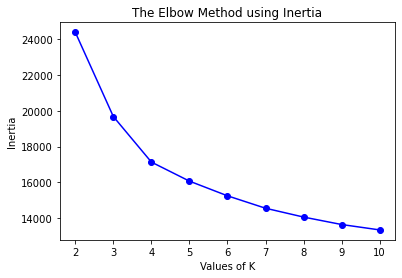

In [94]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

<AxesSubplot:>

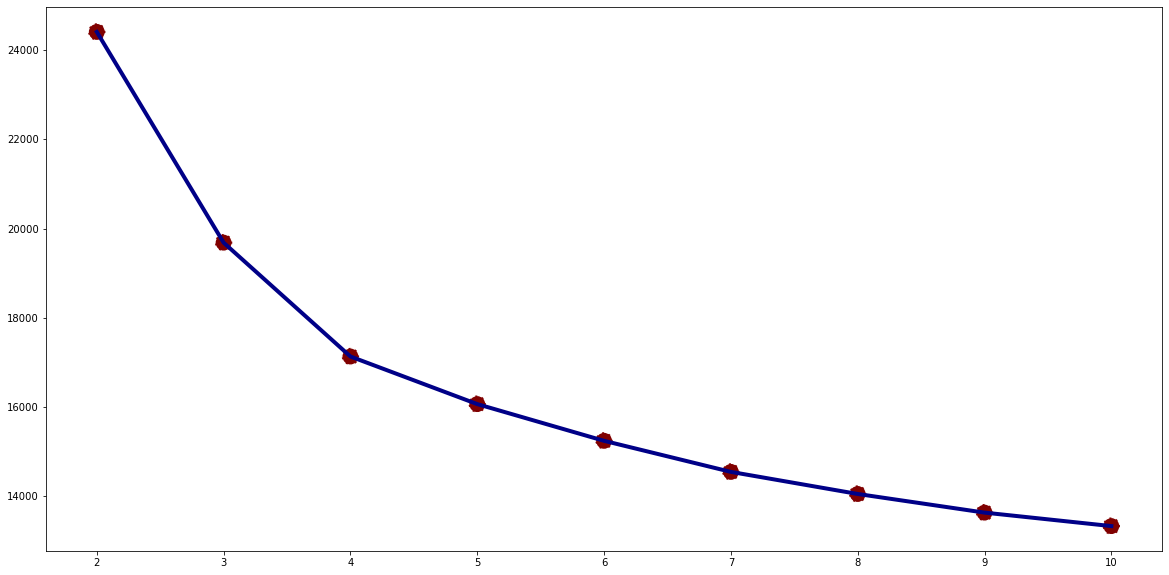

In [95]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [97]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [98]:
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df2)
    preds = kmeans.predict(df2)
    
    score_mahalanobis = silhouette_score(df2, preds, metric='mahalanobis')
    arr_silhouette_score_mahalanobis.append(score_mahalanobis)
    
    score_euclidean = silhouette_score(df2, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<AxesSubplot:>

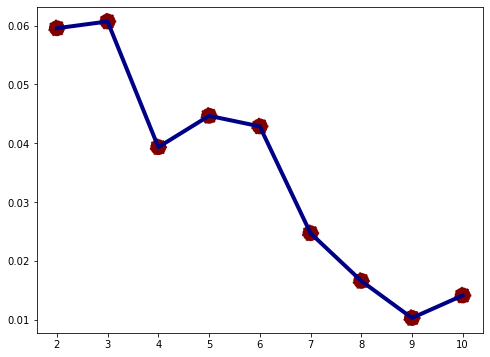

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

<AxesSubplot:>

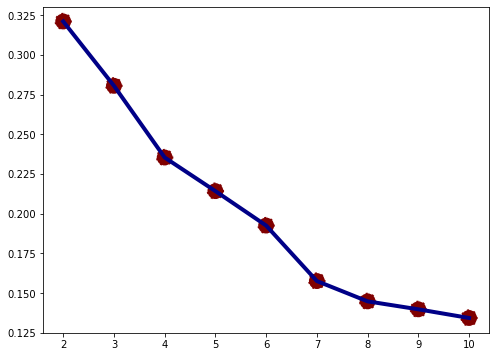

In [100]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

### Evaluation

In [59]:
eval_scores = []
for k in K:
    clusterer = KMeans(n_clusters=k, random_state=0)
    preds = clusterer.fit_predict(df2)

    score = silhouette_score(df2, preds)
    eval_scores.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.33528543183204484
For n_clusters = 3, silhouette score is 0.2109359145929388
For n_clusters = 4, silhouette score is 0.16203462180486197
For n_clusters = 5, silhouette score is 0.1675999740441734
For n_clusters = 6, silhouette score is 0.15808092063037277
For n_clusters = 7, silhouette score is 0.14859528789295048
For n_clusters = 8, silhouette score is 0.12884187233317507
For n_clusters = 9, silhouette score is 0.1290530293646624
For n_clusters = 10, silhouette score is 0.1246304530517457


### KMeans Clustering

In [61]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df2)

KMeans(n_clusters=4, random_state=0)

In [62]:
df2['Cluster'] = kmeans.labels_

In [63]:
df2.head()

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,CVR,AgeGroup,IncomeGroup,Children,TotalSpending,SpendingGroup,NumberOfTransactions,TransactionGroup,MaritalStatus_Bertunangan,MaritalStatus_Cerai,MaritalStatus_Duda,MaritalStatus_Janda,MaritalStatus_Lajang,MaritalStatus_Menikah,Cluster
0,2,0.293067,0.307506,0.691324,0,1,1.020394,0.142857,4,5,0,1.686335,3,1.330316,2,0,0,0,0,1,0,0
1,2,-0.261736,-0.383407,-0.134049,0,0,1.277354,0.000000,4,4,2,-0.961858,0,-1.159029,0,0,0,0,0,1,0,2
2,2,0.926946,-0.797955,-0.546736,0,0,0.335168,0.000000,3,7,0,0.285624,1,0.806243,2,1,0,0,0,0,0,0
3,2,-1.188352,-0.797955,0.278637,0,0,-1.292243,0.000000,1,2,1,-0.918554,0,-0.896993,0,1,0,0,0,0,0,1
4,4,0.300358,1.551149,-0.134049,0,0,-1.035284,0.000000,2,5,1,-0.303973,0,0.544207,1,0,0,0,0,0,1,0


In [64]:
df2.groupby('Cluster')[['Age','Income', 'NumberOfTransactions', 'TotalSpending', 'CVR']].agg(['min', 'mean', 'max'])

Age                        Income                      \
              min      mean       max       min      mean       max   
Cluster                                                               
0       -1.806163  0.395877  2.219540 -0.538338  0.443863  1.315129   
1       -2.320082 -0.825290  1.619967 -2.360429 -1.130799  0.336439   
2       -1.035284  0.487393  2.133886 -1.734641 -0.423931  0.596435   
3       -2.234429 -0.094825  2.219540 -0.024767  1.297399  5.197527   

        NumberOfTransactions                     TotalSpending            \
                         min      mean       max           min      mean   
Cluster                                                                    
0                  -0.634957  0.921401  3.164570     -0.637080  0.385632   
1                  -1.945138 -0.942124  1.592352     -0.998500 -0.852000   
2                  -1.421066 -0.600940  1.068279     -0.993503 -0.722044   
3                  -1.945138  0.745225  2.902534     -0.996834  1.403303   

                   CVR                  
              max  min      mean   max  
Cluster                                 
0        2.039428  0.0  0.020791  1.00  
1        0.390553  0.0  0.014959  0.20  
2        0.383891  0.0  0.013033  0.25  
3        3.198637  0.0  0.139583  1.00

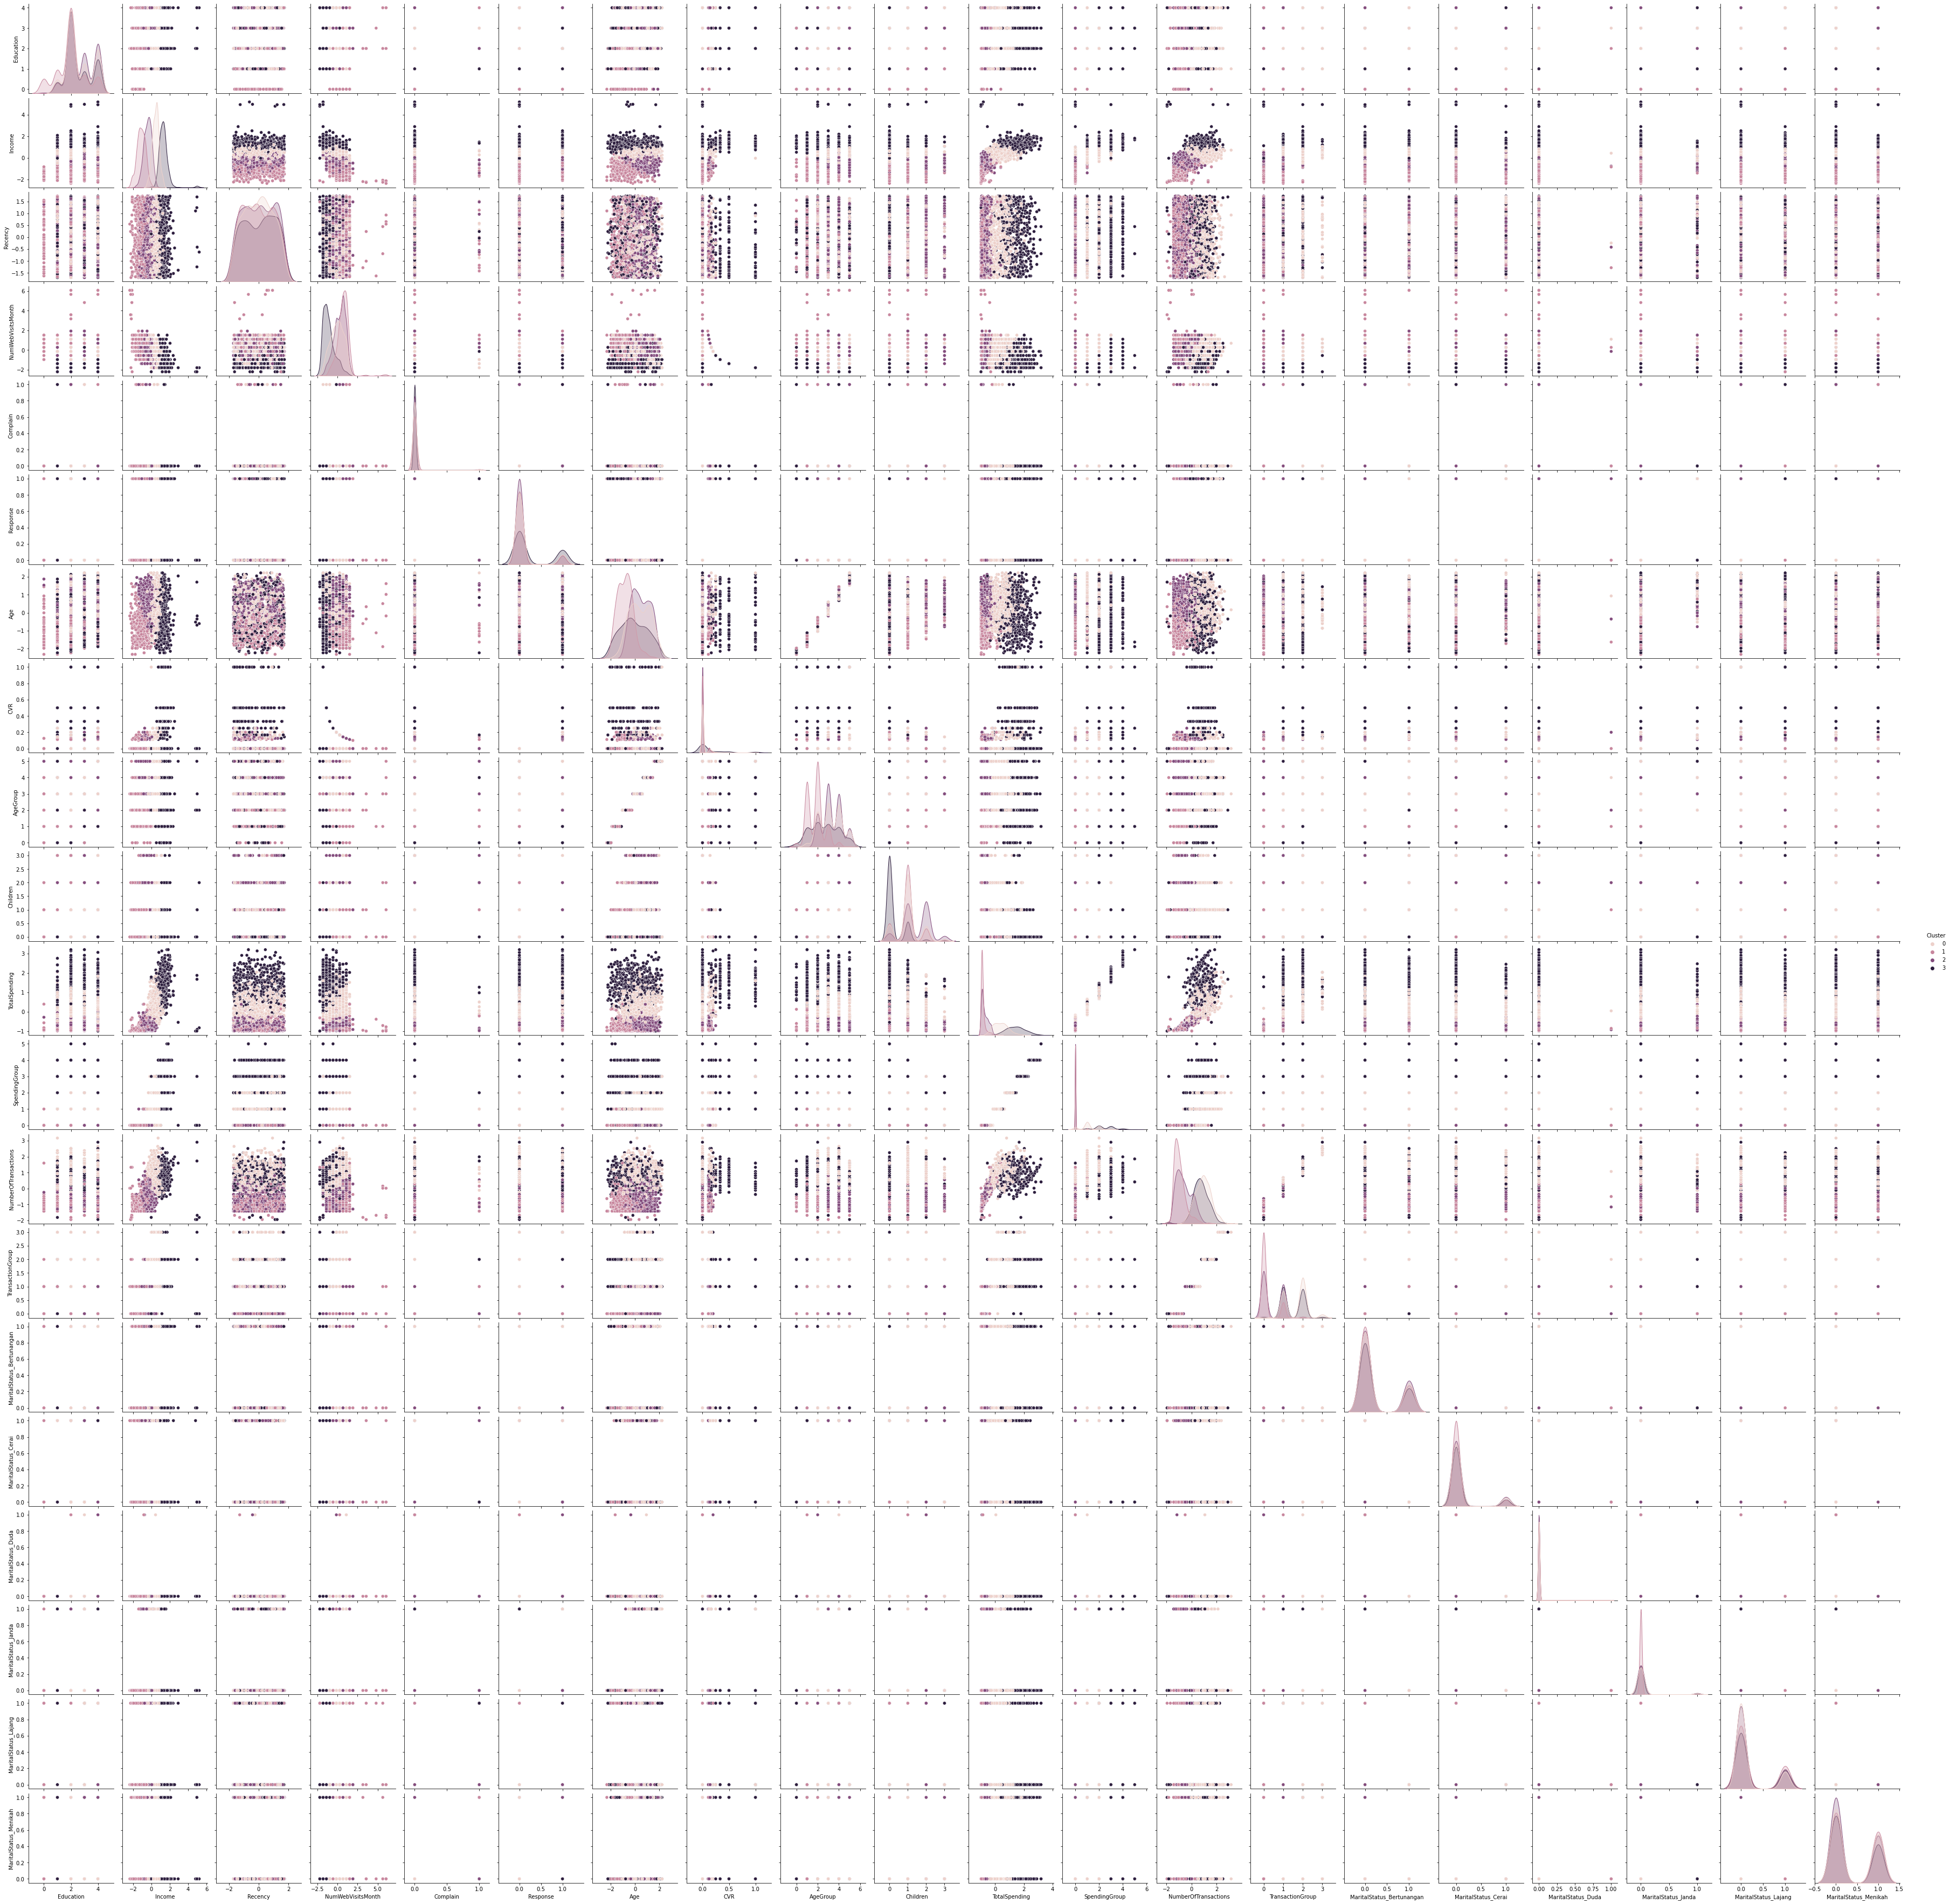

In [101]:
sns.pairplot(data=df2, hue='Cluster')

# Tugas 4 - Customer Personality Analysis for Marketing Retargeting

1. Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan

2. Memilih cluster yang akan dilakukan marketing retargetting

3. Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada

In [65]:
df3=df2.copy()

In [66]:
df3.head()

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,CVR,AgeGroup,IncomeGroup,Children,TotalSpending,SpendingGroup,NumberOfTransactions,TransactionGroup,MaritalStatus_Bertunangan,MaritalStatus_Cerai,MaritalStatus_Duda,MaritalStatus_Janda,MaritalStatus_Lajang,MaritalStatus_Menikah,Cluster
0,2,0.293067,0.307506,0.691324,0,1,1.020394,0.142857,4,5,0,1.686335,3,1.330316,2,0,0,0,0,1,0,0
1,2,-0.261736,-0.383407,-0.134049,0,0,1.277354,0.000000,4,4,2,-0.961858,0,-1.159029,0,0,0,0,0,1,0,2
2,2,0.926946,-0.797955,-0.546736,0,0,0.335168,0.000000,3,7,0,0.285624,1,0.806243,2,1,0,0,0,0,0,0
3,2,-1.188352,-0.797955,0.278637,0,0,-1.292243,0.000000,1,2,1,-0.918554,0,-0.896993,0,1,0,0,0,0,0,1
4,4,0.300358,1.551149,-0.134049,0,0,-1.035284,0.000000,2,5,1,-0.303973,0,0.544207,1,0,0,0,0,0,1,0


In [67]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  2232 non-null   int64   
 1   Income                     2232 non-null   float64 
 2   Recency                    2232 non-null   float64 
 3   NumWebVisitsMonth          2232 non-null   float64 
 4   Complain                   2232 non-null   int64   
 5   Response                   2232 non-null   int64   
 6   Age                        2232 non-null   float64 
 7   CVR                        2232 non-null   float64 
 8   AgeGroup                   2232 non-null   int64   
 9   IncomeGroup                2232 non-null   category
 10  Children                   2232 non-null   int64   
 11  TotalSpending              2232 non-null   float64 
 12  SpendingGroup              2232 non-null   int64   
 13  NumberOfTransactions       2232 n

### 1. Cluster By Age

In [68]:
cluster_age = df3.groupby(['Cluster', 'AgeGroup'])['CVR'].mean()
cluster_age = cluster_age.unstack(level=0).fillna(0.0)
cluster_age.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_age

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
AgeGroup,,,,
0,0.000000,0.009259,0.000000,0.187500
1,0.000000,0.018351,0.000000,0.205556
2,0.010840,0.014097,0.018220,0.111356
3,0.019503,0.012755,0.013993,0.099791
4,0.021954,0.000000,0.010448,0.143762
5,0.046968,0.000000,0.007846,0.149225


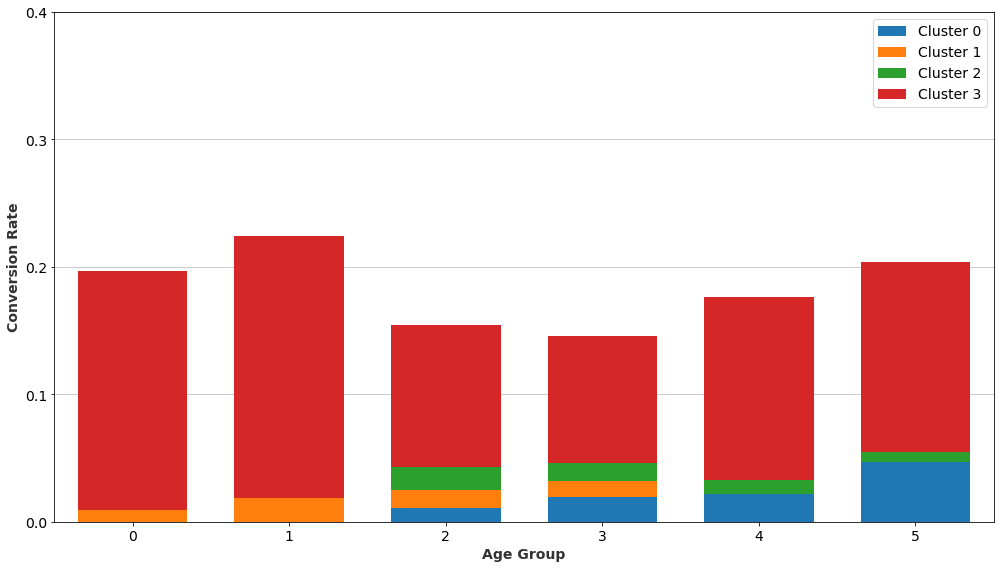

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
cluster_age.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Age Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 5.5) # membatasi x-axis
plt.ylim(0, 0.4) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))

ax.legend(fontsize=14)
plt.tight_layout()

plt.show()

### 2. Cluster by Number of Children

In [70]:
cluster_children = df3.groupby(['Cluster', 'Children'])['CVR'].mean()
cluster_children = cluster_children.unstack(level=0).fillna(0.0)
cluster_children.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_children

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Children,,,,
0,0.050241,0.015544,0.013150,0.167242
1,0.013743,0.015810,0.011546,0.031803
2,0.018898,0.010522,0.016059,0.020408
3,0.028571,0.000000,0.000000,0.000000


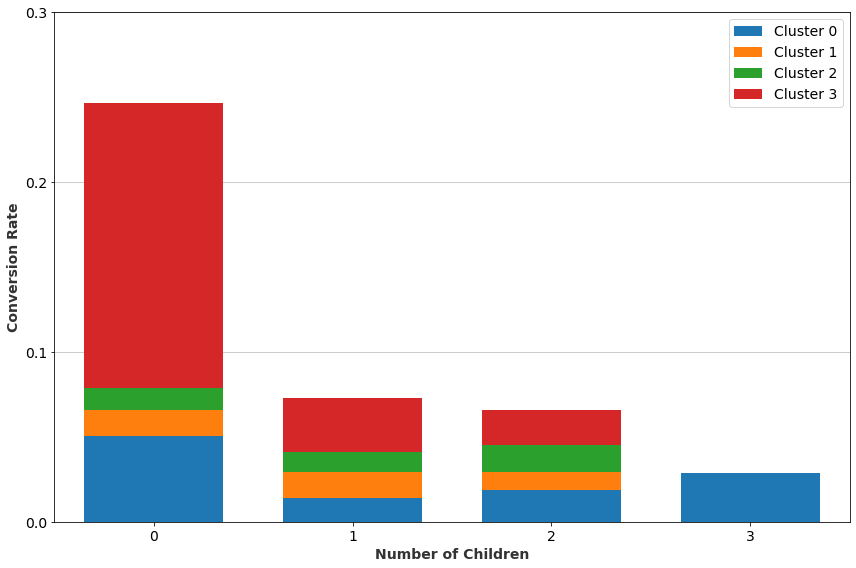

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_children.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Number of Children', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 3.5) # membatasi x-axis
plt.ylim(0, 0.3) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.35, 0.1))

ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

### 3. Cluster by Income

In [74]:
cluster_income = df3.groupby(['Cluster', 'IncomeGroup'])['CVR'].mean()
cluster_income = cluster_income.unstack(level=0).fillna(0.0)
cluster_income.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_income

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
IncomeGroup,,,,
0,0.000000,0.012401,0.000000,0.000000
1,0.000000,0.015148,0.000000,0.000000
2,0.000000,0.015717,0.005622,0.000000
3,0.000000,0.013971,0.021759,0.000000
4,0.041761,0.018750,0.012749,0.000000
5,0.022533,0.000000,0.006088,0.000000
6,0.017973,0.000000,0.000000,0.084425
7,0.014935,0.000000,0.000000,0.090561
8,0.000000,0.000000,0.000000,0.191121


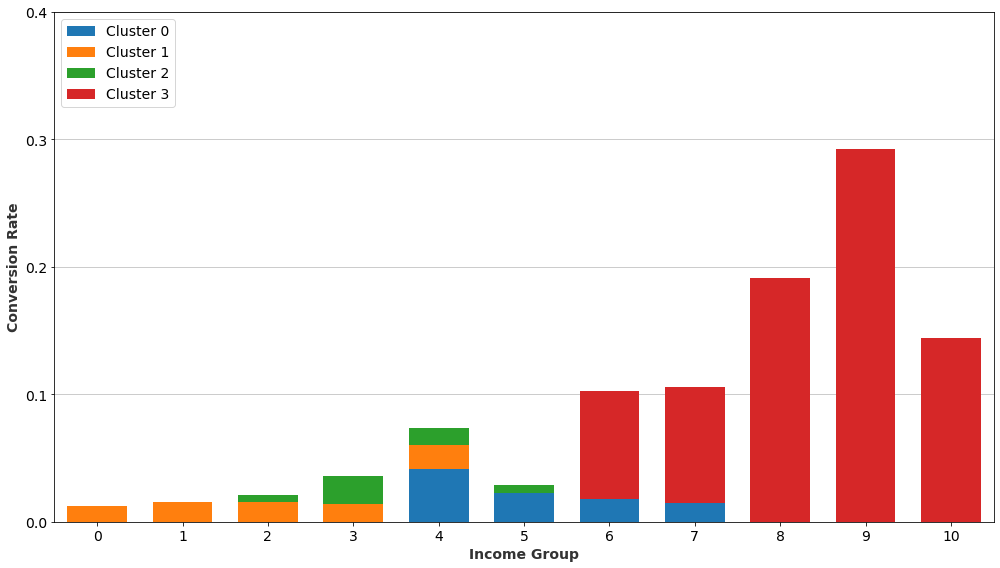

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
cluster_income.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Income Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 10.5) # membatasi x-axis
plt.ylim(0, 0.4) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))

ax.legend(fontsize=14, loc='upper left')
plt.tight_layout()
plt.show()

### 4. Cluster by Transaction

In [77]:
cluster_transaction = df3.groupby(['Cluster', 'TransactionGroup'])['CVR'].mean()
cluster_transaction = cluster_transaction.unstack(level=0).fillna(0.0)
cluster_transaction.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_transaction

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
TransactionGroup,,,,
0,0.000000,0.013257,0.008112,0.000000
1,0.016347,0.024995,0.017656,0.153560
2,0.024626,0.000000,0.092404,0.129471
3,0.010802,0.000000,0.000000,0.096599


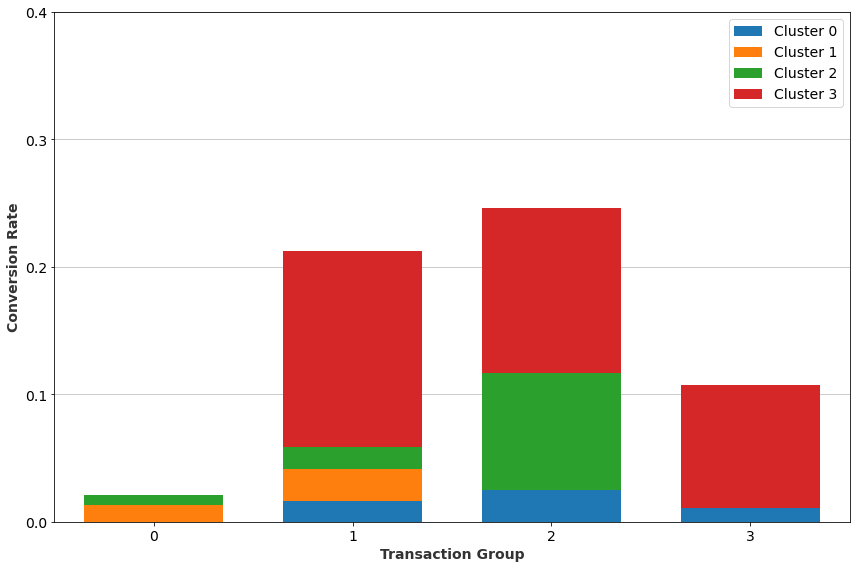

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_transaction.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Transaction Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 3.5) # membatasi x-axis
plt.ylim(0, 0.4) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))

ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

### 5. Cluster by Spending

In [84]:
cluster_by_spending = df3.groupby(['Cluster', 'SpendingGroup'])['CVR'].mean()
spending_order = ['0-0.5M', '0.5M-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '>2.5M']
cluster_by_spending = cluster_by_spending.unstack(level=0).fillna(0.0).reindex(spending_order)
cluster_by_spending.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_spending

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
SpendingGroup,,,,
0-0.5M,NaN,NaN,NaN,NaN
0.5M-1M,NaN,NaN,NaN,NaN
1M-1.5M,NaN,NaN,NaN,NaN
1.5M-2M,NaN,NaN,NaN,NaN
2M-2.5M,NaN,NaN,NaN,NaN
>2.5M,NaN,NaN,NaN,NaN


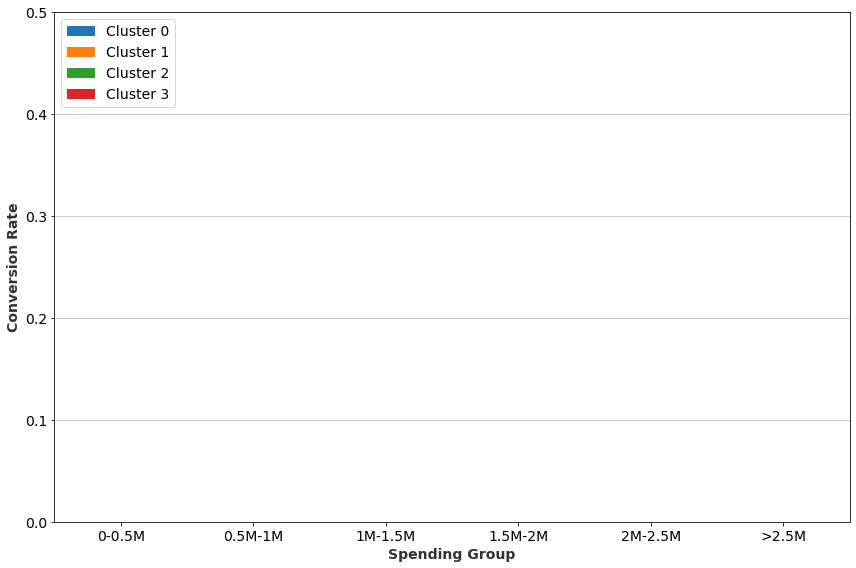

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_spending.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Spending Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 5.5) # membatasi x-axis
plt.ylim(0, 0.5) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.55, 0.1))

ax.legend(fontsize=14, loc='upper left')
plt.tight_layout()
plt.show()